In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

first in grayscale

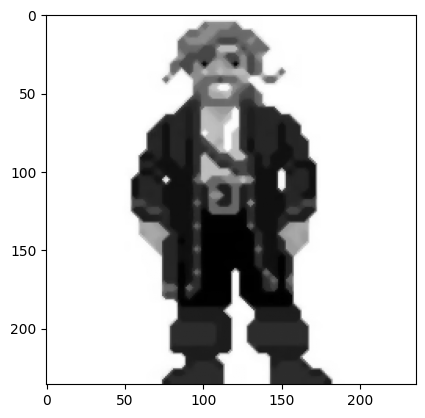

In [2]:
guybrush = cv2.imread('guybrush.jpg', 0)

guybrush = cv2.medianBlur(guybrush, 5)
plt.imshow(guybrush, cmap='gray', vmin=0, vmax=255)

In [3]:
guybrush_laplacian = cv2.Laplacian(guybrush, cv2.CV_64F)

In [4]:
guybrush_laplacian.min()

np.float64(-382.0)

just show clipped Laplacian:

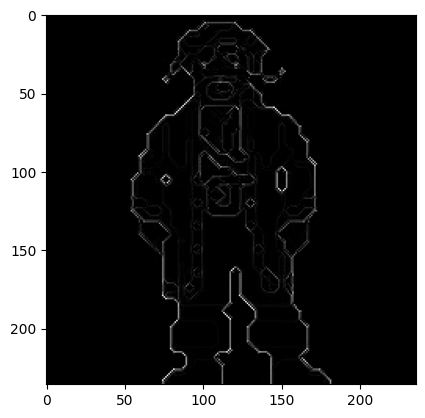

In [5]:
plt.imshow(guybrush_laplacian, cmap='gray', vmin=0, vmax=255)

show scaled Laplacian:

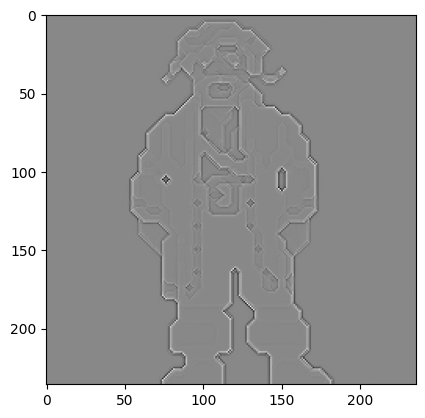

In [6]:
guybrush_laplacian_scaled = guybrush_laplacian - guybrush_laplacian.min()
guybrush_laplacian_scaled = guybrush_laplacian_scaled / guybrush_laplacian_scaled.max() * 255
guybrush_laplacian_scaled = guybrush_laplacian_scaled.astype(np.uint8)

plt.imshow(guybrush_laplacian_scaled, cmap='gray', vmin=0, vmax=255)

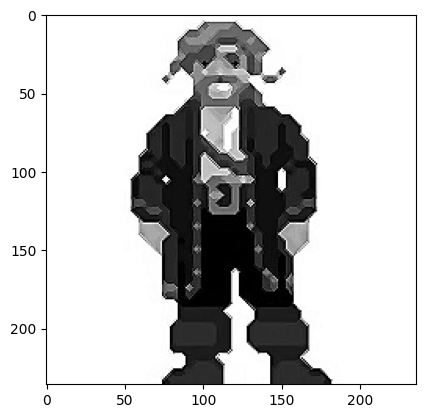

In [7]:
guybrush_sharp = cv2.add(guybrush.astype(float), -guybrush_laplacian)
# guybrush_sharp = cv2.addWeighted(guybrush.astype(float), 1.0, guybrush_laplacian, -1.0, 0)

guybrush_sharp = np.clip(guybrush_sharp, 0., 255.).astype(np.uint8)

plt.imshow(guybrush_sharp, cmap='gray', vmin=0, vmax=255)

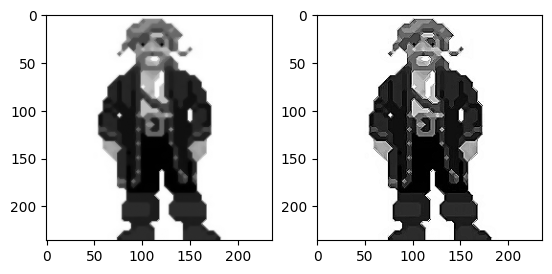

In [8]:
plt.subplot(121)
plt.imshow(guybrush, cmap='gray', vmin=0, vmax=255)
plt.subplot(122)
plt.imshow(guybrush_sharp, cmap='gray', vmin=0, vmax=255)

now in color

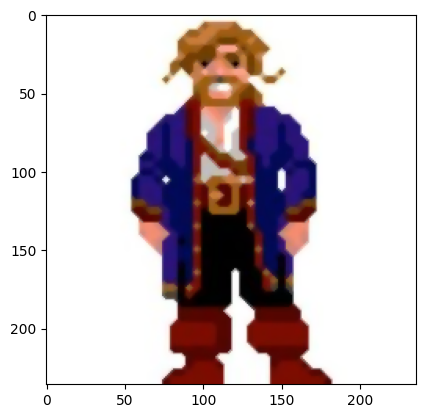

In [9]:
guybrush = cv2.imread('guybrush.jpg')
guybrush = cv2.cvtColor(guybrush, cv2.COLOR_BGR2RGB)
guybrush = cv2.medianBlur(guybrush, 5)
plt.imshow(guybrush)

In [10]:
guybrush_laplacian = cv2.Laplacian(guybrush, cv2.CV_64FC3)

different minima per color channel

In [11]:
np.min(guybrush_laplacian, axis=(0, 1))

array([-396., -384., -354.])

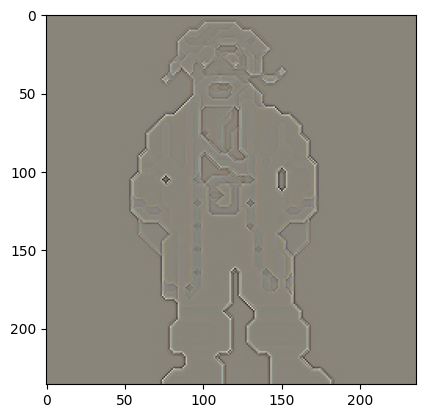

In [12]:
guybrush_laplacian_scaled = guybrush_laplacian - np.min(guybrush_laplacian, axis=(0, 1))
guybrush_laplacian_scaled = guybrush_laplacian_scaled / guybrush_laplacian_scaled.max() * 255
guybrush_laplacian_scaled = guybrush_laplacian_scaled.astype(np.uint8)
plt.imshow(guybrush_laplacian_scaled)

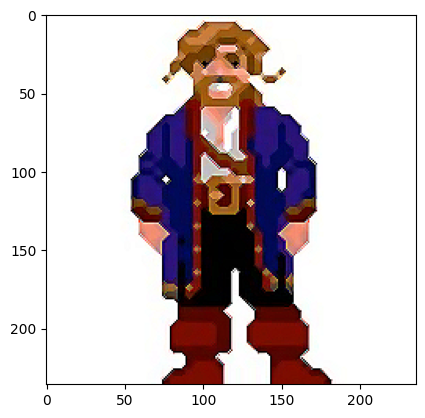

In [13]:
guybrush_sharp = cv2.add(guybrush.astype(float), -guybrush_laplacian)
guybrush_sharp = np.clip(guybrush_sharp, 0., 255.).astype(np.uint8)
plt.imshow(guybrush_sharp)

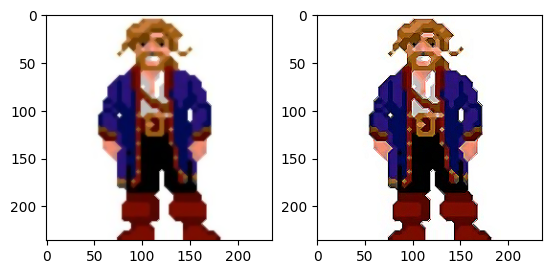

In [14]:
plt.subplot(121)
plt.imshow(guybrush)
plt.subplot(122)
plt.imshow(guybrush_sharp)

above uses the kernel [[ 0.,  1.,  0.], [ 1., -4.,  1.], [ 0.,  1.,  0.]], now try kernel including diagonal directions

In [15]:
kernel = np.ones((3, 3), np.float32)
kernel[1, 1] = -8.
kernel

array([[ 1.,  1.,  1.],
       [ 1., -8.,  1.],
       [ 1.,  1.,  1.]], dtype=float32)

In [16]:
guybrush_laplacian_diag = cv2.filter2D(src=guybrush, ddepth=cv2.CV_64FC3, kernel=kernel)

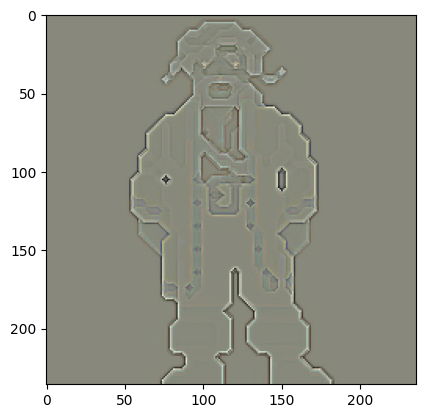

In [17]:
guybrush_laplacian_diag_scaled = guybrush_laplacian_diag - np.min(guybrush_laplacian_diag, axis=(0, 1))
guybrush_laplacian_diag_scaled = guybrush_laplacian_diag_scaled / guybrush_laplacian_diag_scaled.max() * 255
guybrush_laplacian_diag_scaled = guybrush_laplacian_diag_scaled.astype(np.uint8)
plt.imshow(guybrush_laplacian_diag_scaled)

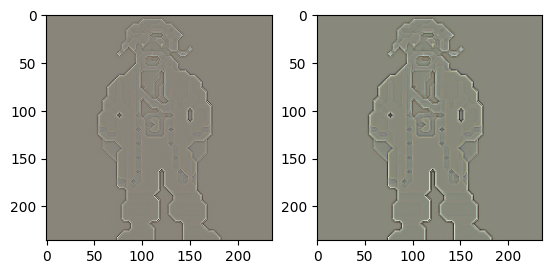

In [18]:
plt.subplot(121)
plt.imshow(guybrush_laplacian_scaled)
plt.subplot(122)
plt.imshow(guybrush_laplacian_diag_scaled)

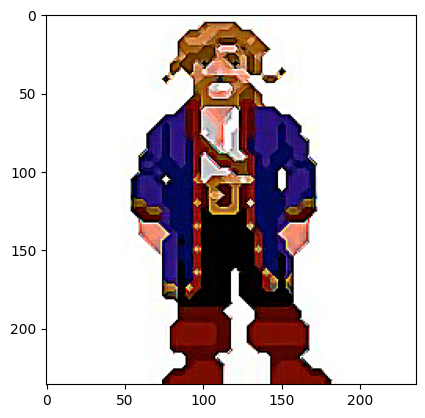

In [19]:
guybrush_sharper = cv2.add(guybrush.astype(float), -guybrush_laplacian_diag)
guybrush_sharper = np.clip(guybrush_sharper, 0., 255.).astype(np.uint8)
plt.imshow(guybrush_sharper)

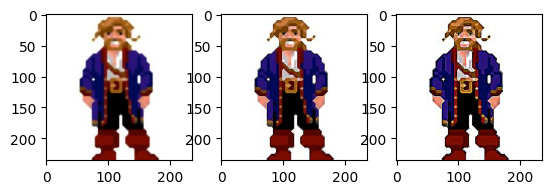

In [20]:
plt.subplot(131)
plt.imshow(guybrush)
plt.subplot(132)
plt.imshow(guybrush_sharp)
plt.subplot(133)
plt.imshow(guybrush_sharper)